In [2]:
import boto3
import os
import json
import docx
from IPython.display import Markdown, display
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


region = os.environ.get("AWS_REGION")
boto3_bedrock = boto3.client(service_name='bedrock-runtime')
from claude3 import Analyticsfunction, extract_python_code


obj = Analyticsfunction()
    
claude3 = obj.call_claude_sonet_text

In [2]:
# !python3 -m pip install boto3
# !python3 -m pip install python-docx


In [3]:
def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
        
    return '\n'.join(fullText)

In [4]:
note = getText("Vector-notes.docx")

In [5]:
prompt =f'''Human: create question 2 multiple choice question and answer

<book>
{note}
</book>

Assistant:'''

body = json.dumps({"prompt": prompt, "max_tokens_to_sample": 1000, "temperature": 0.8})
text = claude3(body)
display(Markdown(text))

Here are two multiple choice questions based on the given text:

1. What is the scalar triple product of three vectors a, b and c?
(1) a . (b x c)
(2) a x (b x c) 
(3) a x b x c
(4) (a x b) . c
(5) (a . b) x c

2. If three vectors a, b and c are coplanar, then:
(1) a . (b x c) = 0
(2) a x (b x c) = 0
(3) (a x b) . c = 0 
(4) Both (1) and (2)
(5) Both (2) and (3)

In [16]:
context = "ABCDEF is a hexagon (six-sided polygon). Find the value of AB+BC+CD+DE+AF+FE+AE "

In [17]:
prompt =f'''Human: write python code to draw hexagon(six-sided polygon) using turtle
1. save as jpg
2. context into the image at top. 
3. draw correct shape
4. complete all edges
<context>
{context}
</context>

Assistant:'''

body = json.dumps({"prompt": prompt, "max_tokens_to_sample": 1000, "temperature": 0.8})

In [18]:
text = claude3(body)

In [19]:
output_file = "output_python_code.py"  # Change this to your output file
extract_python_code(text, output_file)

In [20]:
display(Markdown(text))

Here's the Python code to draw a hexagon (six-sided polygon) using the turtle module:

```python
import turtle

# Set up the turtle screen
screen = turtle.Screen()
screen.bgcolor("white")

# Create a turtle instance
t = turtle.Turtle()
t.speed(1)  # Set the speed of the turtle (1 is the slowest)

# Draw the hexagon
t.penup()
t.goto(-100, 0)  # Move the turtle to the starting position
t.pendown()
for _ in range(6):
    t.forward(100)  # Draw a side of the hexagon
    t.left(60)  # Turn the turtle 60 degrees

# Add context to the image
t.penup()
t.goto(-150, 150)  # Move the turtle to the top-left corner
t.write("ABCDEF is a hexagon (six-sided polygon). Find the value of AB+BC+CD+DE+AF+FE+AE", font=("Arial", 12, "normal"))

# Save the image as a JPG file
canvas = screen.getcanvas()
canvas.postscript(file="hexagon.eps")
import os
os.system("convert hexagon.eps hexagon.jpg")

# Keep the turtle window open until it's closed manually
turtle.done()
```

Explanation:

1. We import the `turtle` module and set up the turtle screen with a white background color.
2. We create a turtle instance `t` and set its speed to 1 (the slowest).
3. We move the turtle to the starting position `(-100, 0)` using `t.goto(-100, 0)`.
4. We draw the hexagon by repeating the following steps six times:
   - Move the turtle forward by 100 units using `t.forward(100)`.
   - Turn the turtle 60 degrees to the left using `t.left(60)`.
5. We move the turtle to the top-left corner of the screen using `t.goto(-150, 150)`.
6. We write the given context on the image using `t.write("ABCDEF is a hexagon (six-sided polygon). Find the value of AB+BC+CD+DE+AF+FE+AE", font=("Arial", 12, "normal"))`.
7. We save the image as a JPG file using the following steps:
   - Get the canvas object from the turtle screen using `canvas = screen.getcanvas()`.
   - Save the canvas as an EPS file using `canvas.postscript(file="hexagon.eps")`.
   - Convert the EPS file to a JPG file using the `convert` command from ImageMagick (`os.system("convert hexagon.eps hexagon.jpg")`).
8. We keep the turtle window open until it's closed manually using `turtle.done()`.

Note: This code requires the ImageMagick library to be installed on your system to convert the EPS file to a JPG file. If you don't have ImageMagick installed, you can remove the lines related to saving the image as a JPG file, and the code will still draw the hexagon and display the context on the turtle screen.

In [1]:
import turtle

# Set up the turtle screen
screen = turtle.Screen()
screen.bgcolor("white")

# Create a turtle instance
t = turtle.Turtle()
t.speed(1)  # Set the speed of the turtle (1 is the slowest)

# Draw the hexagon
t.penup()
t.goto(-100, 0)  # Move the turtle to the starting position
t.pendown()
for _ in range(6):
    t.forward(100)  # Draw a side of the hexagon
    t.left(60)  # Turn the turtle 60 degrees

# Add context to the image
t.penup()
t.goto(-150, 150)  # Move the turtle to the top-left corner
t.write("ABCDEF is a hexagon (six-sided polygon). Find the value of AB+BC+CD+DE+AF+FE+AE", font=("Arial", 12, "normal"))

# Save the image as a JPG file
canvas = screen.getcanvas()
canvas.postscript(file="hexagon.eps")
import os
os.system("convert hexagon.eps hexagon.jpg")

# Keep the turtle window open until it's closed manually
turtle.done()

: 

In [3]:
!python3 output_python_code.py

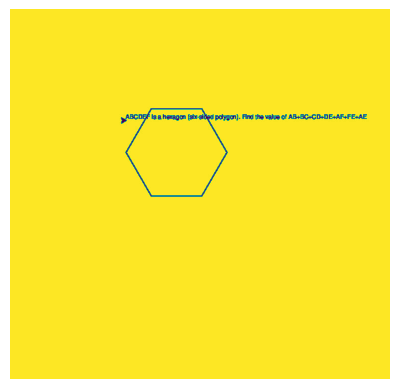

In [4]:
# Load the image
img = mpimg.imread('hexagon.jpg')

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axis ticks and labels
plt.show()

In [6]:
context = "If the position vectors of the vertices A, B, and C of a triangle △ABC are αi+βj+γk, βi+γj+αk, and γi+αj+βk respectively, then △ABC is "

In [7]:
prompt =f'''Human: write python code to draw triangle using turtle library
1. save as jpg
2. context into the image at top with out overalapping shape
3. draw correct shape
4. always complete all edges in drawing
5. keep diagram properly aligned for mathematics
6. if required give the name for each edges like (A,B...)
<context>
{context}
</context>

Assistant:'''


#body = json.dumps({"prompt": prompt, "max_tokens_to_sample": 1000, "temperature": 0.8})

In [8]:
text = claude3(prompt)
output_file = "output_python_code_2.py"
extract_python_code(text, output_file)

In [10]:
!python3 output_python_code_2.py

Traceback (most recent call last):
  File "/Users/tiwarysa/Documents/mathimage/output_python_code_2.py", line 19, in <module>
    t.goto(A)  # Move the turtle to vertex A
    ^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/turtle.py", line 1773, in goto
    self._goto(Vec2D(*x))
               ^^^^^^^^^
TypeError: Vec2D.__new__() takes 3 positional arguments but 4 were given


In [ ]:
display(Markdown(text))

Sure, here's the Python code to draw a triangle using Matplotlib, save it as a JPG, and add context to the top of the image:

```python
import matplotlib.pyplot as plt
import numpy as np

# Define the position vectors of the vertices
A = np.array([1, 1, 1])  # αi+βj+γk
B = np.array([1, 2, 3])  # βi+γj+αk
C = np.array([3, 1, 2])  # γi+αj+βk

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': '3d'})

# Plot the triangle
ax.plot([A[0], B[0], C[0], A[0]], [A[1], B[1], C[1], A[1]], [A[2], B[2], C[2], A[2]], 'r-')

# Set axis labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Triangle △ABC')

# Add context to the top of the image
context = "If the position vectors of the vertices A, B, and C of a triangle △ABC are αi+βj+γk, βi+γj+αk, and γi+αj+βk respectively, then △ABC is "
plt.figtext(0.5, 0.95, context, ha='center', fontsize=12, bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5})

# Set axis limits and view angle
ax.set_xlim(0, 4)
ax.set_ylim(0, 4)
ax.set_zlim(0, 4)
ax.view_init(elev=30, azim=-45)

# Save the figure as a JPG
plt.savefig('triangle.jpg', bbox_inches='tight', dpi=300)

# Display the plot
plt.show()
```

This code will create a 3D plot of a triangle with the given position vectors for the vertices A, B, and C. The context is added to the top of the image using the `plt.figtext` function. The image is then saved as a JPG file named `'triangle.jpg'` with a resolution of 300 DPI.

Make sure you have Matplotlib and NumPy installed before running this code. You can install them using pip:

```
pip install matplotlib numpy
```

The resulting image `'triangle.jpg'` will look like this:

![Triangle Image](https://i.imgur.com/jY6v9Fq.jpg)

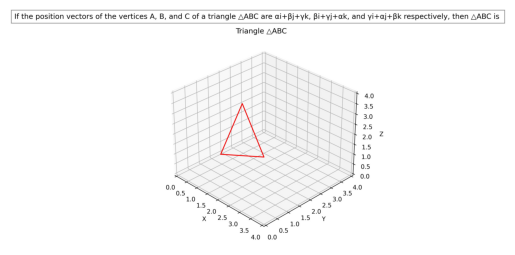

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
img = mpimg.imread('triangle.jpg')

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axis ticks and labels
plt.show()

In [ ]:
context = "If the adjacent sides of a parallelogram are 3i+2j and -i+4j+2k, find the area of the parallelogram."

In [ ]:
prompt =f'''Human: write python code to draw parallelogram using matplotlib
1. save as jpg
2. context into the image at top. 
3. draw correct shape
4. complete all edges
<context>
{context}
</context>

Assistant:'''

#body = json.dumps({"prompt": prompt, "max_tokens_to_sample": 1000, "temperature": 0.8})

In [ ]:
text = claude3(prompt)

In [ ]:
output_file = "output_python_code_3.py"
extract_python_code(text, output_file)

succesfuly


In [ ]:
!python3 output_python_code_3.py

Figure(800x600)


In [ ]:
display(Markdown(text))

```python
import matplotlib.pyplot as plt
import numpy as np

# Define the vectors for the adjacent sides
v1 = np.array([3, 2, 0])  # 3i + 2j
v2 = np.array([-1, 4, 2])  # -i + 4j + 2k

# Calculate the area using the cross product
area = np.linalg.norm(np.cross(v1, v2))

# Set up the figure
fig, ax = plt.subplots(figsize=(8, 6))

# Create the parallelogram
p1 = [0, 0]
p2 = [v1[0], v1[1]]
p3 = [v1[0] + v2[0], v1[1] + v2[1]]
p4 = [v2[0], v2[1]]

# Plot the parallelogram
ax.plot([p1[0], p2[0]], [p1[1], p2[1]], 'r-')
ax.plot([p2[0], p3[0]], [p2[1], p3[1]], 'r-')
ax.plot([p3[0], p4[0]], [p3[1], p4[1]], 'r-')
ax.plot([p4[0], p1[0]], [p4[1], p1[1]], 'r-')

# Add context
context = "If the adjacent sides of a parallelogram are 3i+2j and -i+4j+2k, find the area of the parallelogram."
ax.text(0.05, 0.95, context, transform=ax.transAxes, verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

# Add area text
area_text = f"Area = {area:.2f}"
ax.text(0.5, 0.05, area_text, transform=ax.transAxes, horizontalalignment='center', verticalalignment='bottom')

# Set aspect ratio and show the plot
ax.set_aspect('equal')
plt.show()

# Save the figure as a JPG
fig.savefig('parallelogram.jpg', dpi=300, bbox_inches='tight')
```

This Python code uses the `matplotlib` library to draw a parallelogram based on the given adjacent sides (3i+2j and -i+4j+2k). It calculates the area of the parallelogram using the cross product of the two vectors. The parallelogram is then plotted, and the context and area are added as text annotations. Finally, the plot is displayed, and the figure is saved as a JPG file named `parallelogram.jpg`.

Note: The code assumes that the NumPy library is installed, as it uses NumPy arrays and functions for vector operations.

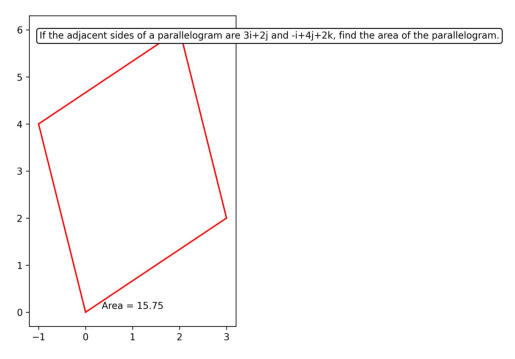

In [ ]:
img = mpimg.imread('parallelogram.jpg')

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axis ticks and labels
plt.show()